In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## from sklearn.family import model

* 2. Splitting data
* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

* 3. Fitting data
* model.fit(X_train, y_train)

* 4. Predictiong data
* predictions = logmodel.predict(X_test)
* 5. Probablitiy of Predicted Date
* model.predict_proba(X_test)

## Regression Error Metrics

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Square Error (RMSE)

In [9]:
  df = pd.read_csv('Advertising.csv')

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
pd.set_option('display.max_columns', None)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


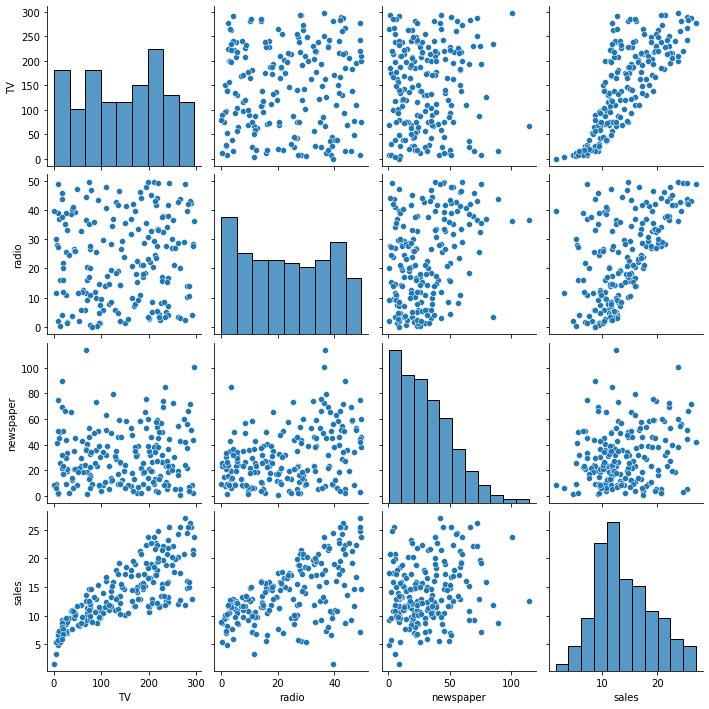

In [21]:
sns.pairplot(df)

In [23]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

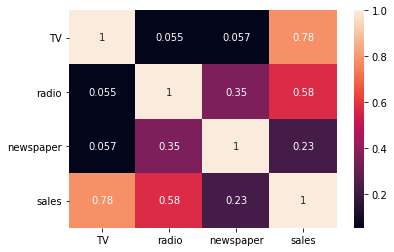

In [25]:
sns.heatmap(df.corr(), annot=True)

In [27]:
X = df.drop('sales', axis = 1)  # df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 95 to 96
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [37]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [39]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

In [41]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [51]:
my_dict = {'Actual' : y_test, 'Pred' : y_pred}
compare = pd.DataFrame(my_dict)

In [53]:
compare['Absolute Error'] = np.absolute(np.subtract(compare[['Actual']], compare[['Pred']]))

<ipython-input-53-6acdd104f78c>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  compare['Absolute Error'] = np.absolute(np.subtract(compare[['Actual']], compare[['Pred']]))


In [55]:
compare['Absolute Error Squared'] = np.square(np.subtract(compare[['Actual']], compare[['Pred']]))

<ipython-input-55-7c0a6f6adb53>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  compare['Absolute Error Squared'] = np.square(np.subtract(compare[['Actual']], compare[['Pred']]))


In [57]:
compare['Root Absolute Error Squared'] = np.sqrt(compare['Absolute Error Squared'])

In [59]:
compare

,Actual,Pred,Absolute Error,Absolute Error Squared,Root Absolute Error Squared
95,16.9,16.565396,0.334604,0.111960,0.334604
15,22.4,21.188228,1.211772,1.468392,1.211772
30,21.4,21.551071,0.151071,0.022822,0.151071
158,7.3,10.889238,3.589238,12.882631,3.589238
128,24.7,22.202320,2.497680,6.238406,2.497680
115,12.6,13.355569,0.755569,0.570884,0.755569
69,22.3,21.196925,1.103075,1.216774,1.103075
170,8.4,7.350285,1.049715,1.101901,1.049715
174,11.5,13.275471,1.775471,3.152297,1.775471
45,14.9,15.124495,0.224495,0.050398,0.224495


In [61]:
compare['Absolute Error'].mean()

1.5116692224549086

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
r2_score(y_test, y_pred) # R^2 Coefficienet determination

0.8609466508230368

In [67]:
compare['Absolute Error'].mean()

1.5116692224549086

In [69]:
mean_absolute_error(y_test, y_pred)

1.5116692224549086

In [71]:
compare['Absolute Error Squared'].mean()

3.7967972367152196

In [73]:
mean_squared_error(y_test, y_pred)

3.7967972367152196

In [75]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.9485372043446385

In [77]:
df['sales'].mean()

14.0225

In [79]:
1.51 / 14

0.10785714285714286

In [81]:
1.94 / 14

0.13857142857142857

In [83]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score_r2 = r2_score(actual, pred)
    return print('r2_score', score_r2, '\n', 'MAE',mae,'\n','MSE',mse,'\n','RMSE',rmse)


In [85]:
eval_metric(y_test, y_pred)

r2_score 0.8609466508230368 
 MAE 1.5116692224549086 
 MSE 3.7967972367152196 
 RMSE 1.9485372043446385


In [87]:
y_train_pred = model.predict(X_train)

In [88]:
eval_metric(y_train, y_train_pred)

r2_score 0.9055159502227753 
 MAE 1.1581502948072528 
 MSE 2.479355178905786 
 RMSE 1.574596830590544


## Plotting residuals

* To evaluate the adaptability to Linear Regression

In [89]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

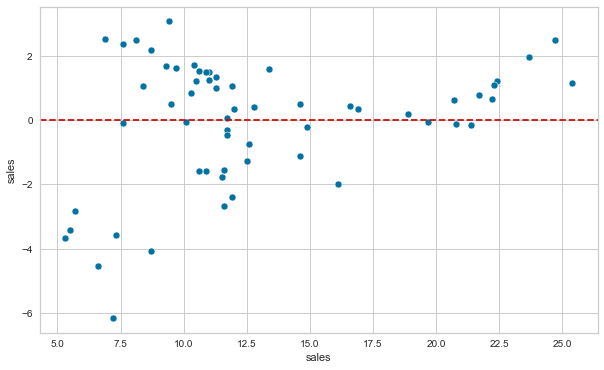

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color='r', linestyle = "--")

<AxesSubplot:xlabel='sales', ylabel='Density'>

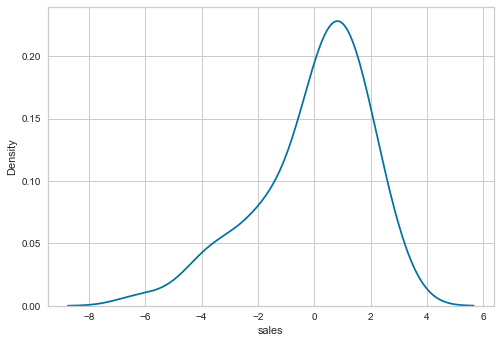

In [91]:
sns.kdeplot(residuals)

In [92]:
pip install yellowbrick

You should consider upgrading via the 'C:\Users\ihakk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



In [94]:
from yellowbrick.regressor import ResidualsPlot

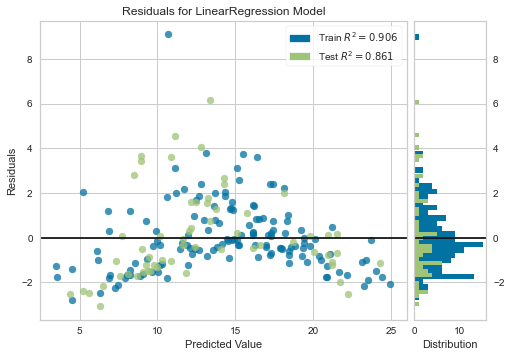

In [95]:
# Initiate the Linear model and visualiser
model = LinearRegression()
visualiser = ResidualsPlot(model)

visualiser.fit(X_train, y_train)  # Fit the training data to the visualizer
visualiser.score(X_test, y_test) # Evaluate the model on the test data
visualiser.show(); # Finalize and render the figure

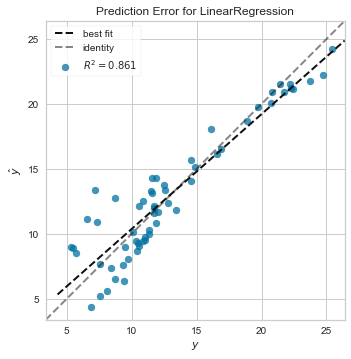

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [96]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [97]:
final_model = LinearRegression()

In [99]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [100]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [101]:
final_model.intercept_

2.938889369459414

In [114]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])

In [115]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [106]:
adv = np.array([150, 20, 15]).reshape(1, -1)

In [107]:
final_model.predict(adv)

array([13.55862413])

In [109]:
adv_2 = [[150, 20, 15], [160, 20, 15]]
adv_2 = np.array(adv_2)

In [110]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [111]:
np.array(adv).reshape(3, 1)

array([[150],
       [ 20],
       [ 15]])

In [116]:
coeff_df * np.array(adv).reshape(3, 1)

,Coefficient
TV,6.864697
radio,3.770600
newspaper,-0.015562


In [117]:
6.864697 / 13.55862413

0.5062974630892729

This shows TV has an effect almost % 50 in whole data. Upon that examination, we could drop 'newspaper' feature from the data.


In [118]:
X = df[['TV', 'radio']]
y = df['sales']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
model_new = LinearRegression()

In [121]:
model_new.fit(X_train, y_train)

LinearRegression()

In [122]:
y_pred_new = model_new.predict(X_test)

In [125]:
eval_metric(y_test, y_pred_new)

r2_score 0.8656253548947075 
 MAE 1.4758950903812142 
 MSE 3.6690470545306795 
 RMSE 1.9154756731764253
